This file contains how we need to perform `Exploratory Data Analysis` on the given dataset before setting up a machine learning model. Several steps included in this process.
1. Import libraries.
2. Reading and creating dataframe from the dataset.
3. Check for null values and duplicates in the rows and columns. 
4. If there is any time stamp in the dataframe, split them to individual columns and delete time stamp column
5. Vizualize correlation of features to the target with the help of heatmap or bar graph
6. Plot the distrubution of various discrete features.
7. Plot the distrubution of various continious features(to see wether it is Gaussian distrubution/ or not- helps in preprocessing)
8. Plot the distrubution of target(to see wether it is Gaussian distrubution/ or not)
9. Make notes on all the findings/observations.
10. Perform EDA with all the features with respect to target.

In [2]:
# The First task is to import libraries that required to clean, analyze and visulazie data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters #Register pandas formatters and converters with matplotlib.
from pylab import rcParams # for customizing matplotlib graphs.
sns.set_style("whitegrid") # This one is very important to keep overall plot background as white.


In [34]:
data = pd.read_csv('london_merged.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
data.isnull().sum() # for columns in the data frame.
data.duplicated().value_counts() # for duplicated elements in the rows

False    17414
dtype: int64

In [35]:
data['year'] = data['timestamp'].apply(lambda row: row[:4])
data['month'] = data['timestamp'].apply(lambda row: row.split('-')[2][:2] )
data['day'] = data['timestamp'].apply(lambda row: row.split('-')[1][:2])
data['hour'] = data['timestamp'].apply(lambda row: row.split(':')[0][-2:] )
data.drop('timestamp', axis=1, inplace=True)
# changining dtype for multiple columns in a single step.
data = data.astype({'year':'int64','month':'int64','day':'int64','hour':'int64'}) 
data.dtypes

cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
year              int64
month             int64
day               int64
hour              int64
dtype: object

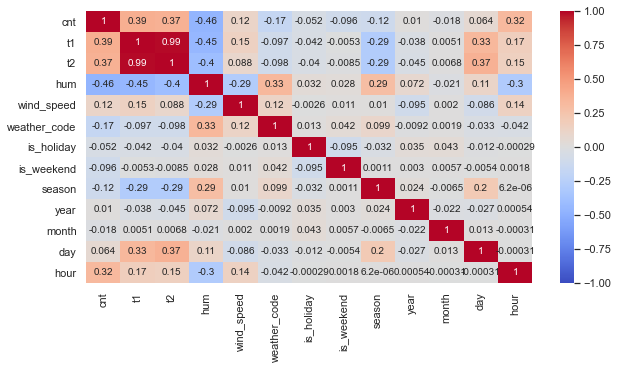

In [41]:
# Vizualize correlation of features to the target with the help of heatmap or bar graph
# annots means values in the boxes of heatmap.
# Note: Inorder to get all the columns in the heatmap, the column dtype should be "int64"/"float64"

sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', annot_kws={'size':10})
sns.set(rc={'figure.figsize':(10,5)});

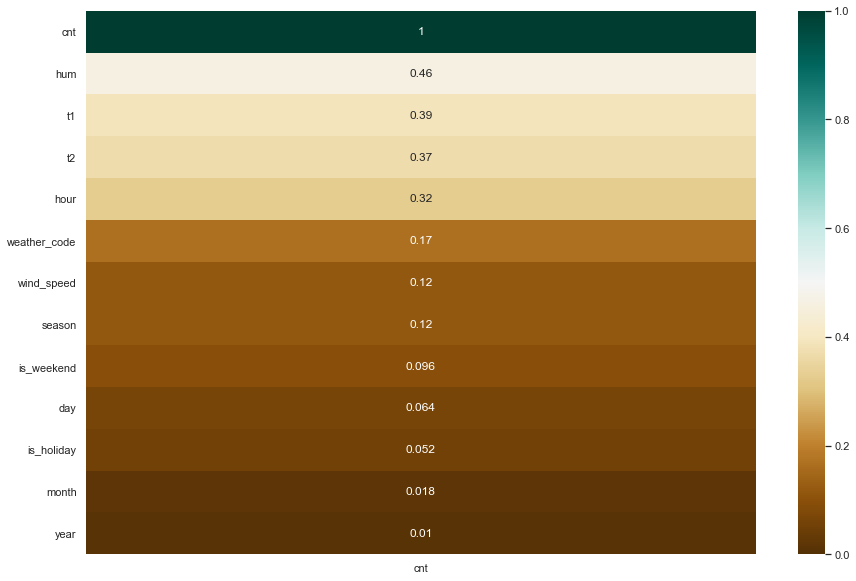

In [56]:
# .abs() to keep correlation bweteen 0 to 1
# with out .abs() the correlation is from -1 to 1.
# if we did not use this loc[:,['cnt']] then will get shape error.
sns.heatmap(data.corr().loc[:,['cnt']].abs().sort_values(by=['cnt'], ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG', annot_kws={'size':12})
sns.set(rc={'figure.figsize':(10,7)});

<AxesSubplot:>

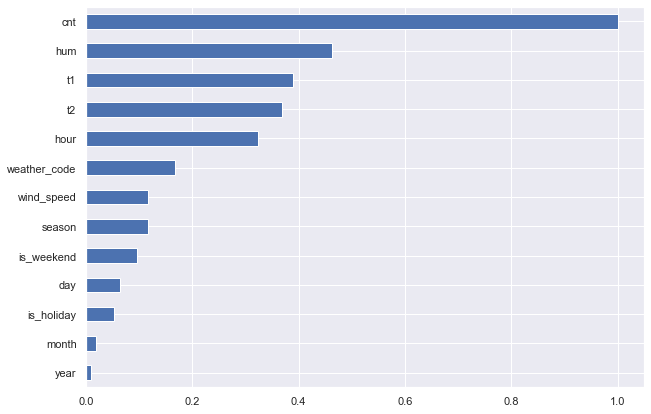

In [57]:
# for plotting features correlation using barchart
data.corr()['cnt'].abs().sort_values().plot(kind = 'barh')

### Visualize the distrubution of data.  
`Discrete Features are` Season, Holiday, Weekend and Weather_code


Text(0.5, 1.0, 'Distrubution of data based on season category')

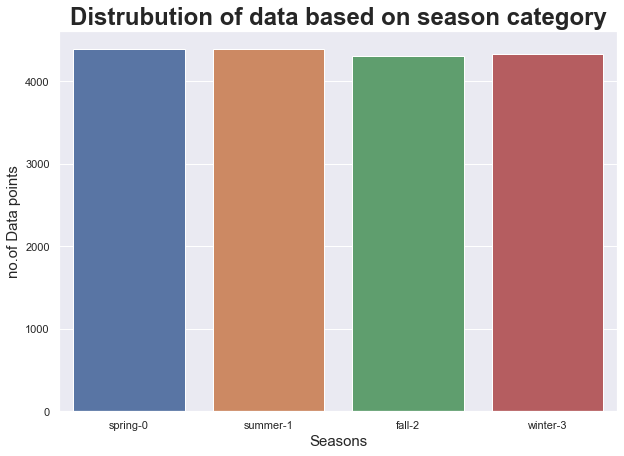

In [78]:
# Countplot counts the no.of datapoints belong to particular category
# Countplot can be used for discrete variables.
################.........Begin...........#########################
a= sns.countplot(x='season', data=data)
a.set_xticklabels(['spring-0','summer-1','fall-2','winter-3'])
a.set_xlabel('Seasons', fontsize=15)
a.set_ylabel('no.of Data points', fontsize=15)
a.set_title('Distrubution of data based on season category',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
##################...........End.....................#########

#plt.legend(labels=['0-spring,1-summer', '2-fall', '3-winter.'],loc = 2, bbox_to_anchor = (1,1), title='Distrubution of Season Feature')
# Count on y-axis is no.of datapaoints of season-1 in the dataframe.

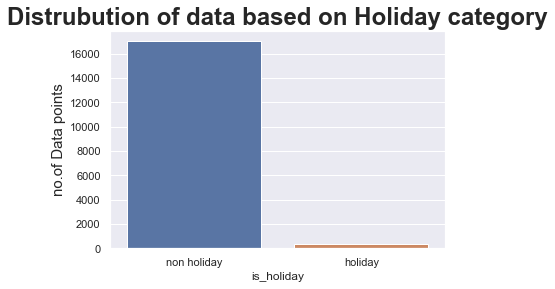

In [87]:
b = sns.countplot(x='is_holiday', data=data)
b.set_xticklabels(['non holiday','holiday'])
b.set_ylabel('no.of Data points', fontsize=15)
b.set_title('Distrubution of data based on Holiday category',fontdict= { 'fontsize': 24, 'fontweight':'bold'})
sns.set(rc = {'figure.figsize':(6,4)});

